## K-Means Clustering

This chapter introduces a different clustering algorithm - k-means clustering - and its implementation in SciPy. K-means clustering overcomes the biggest drawback of hierarchical clustering that was discussed in the last chapter. As dendrograms are specific to hierarchical clustering, this chapter discusses one method to find the number of clusters before running k-means clustering. The chapter concludes with a discussion on the limitations of k-means clustering and discusses considerations while using this algorithm.

### K-means clustering: first exercise
This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

1. Define cluster centers through kmeans() function. It has two required arguments: observations and number of clusters.
2. Assign cluster labels through the vq() function. It has two required arguments: observations and cluster centers.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

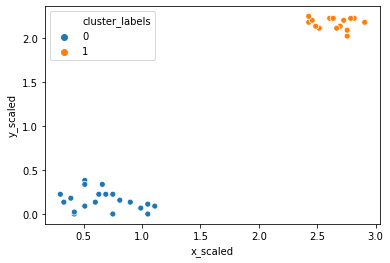

0.20140463751291524
0.20140463751291524


In [5]:
import pandas as pd
import numpy as np
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns

# load data
comic_con = pd.read_csv('comic_con.csv')

# normalize data 
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']],cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

print(distortion)
# the mean of the distortion list (from vq) should be approx the distortion(from kmeans) 
print(np.mean(distortion_list))


### How many clusters?  Elbow method on distinct clusters
Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

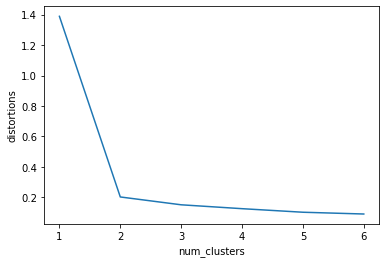

In [6]:
# critique: no method to find right numbers of clusters
# Elbow method, idea: as clusters increase distortion decreases,

# define variables
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x= 'num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

# the "best" number of cluster is when the plot change 'abruptly', 
# so 2 clusters are the most appropiate

### Elbow method on uniform data
In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points on the console before proceeding with the exercise.

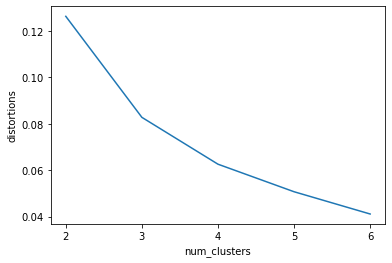

In [8]:
# generate uniform data
uniform_data = np.random.uniform(0,1,1000)

#define variables
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data,i) 
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

# as you can check there is no zone in the plot when this change abruptly (could be 3 o 4)
# so, with uniform data the elbow method failed to choose a number of clusters

### Impact of seeds on distinct clusters
You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

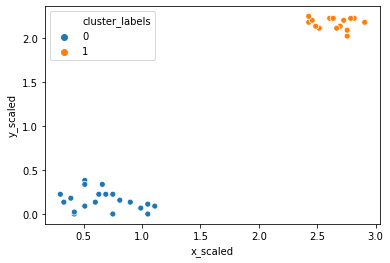

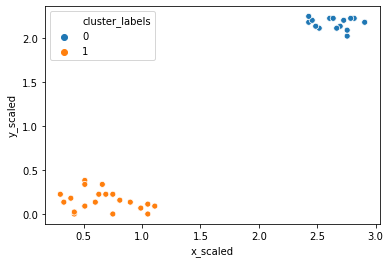

In [10]:
# Limitations of k-means clustering

# find right number of clusters
# impact of seeds - related with randomnumber generation and with the 
# problem with try to use kmeans with uniform data.

# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# change seed
random.seed([1,2,1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# the plot does not change

### Uniform clustering patterns
Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

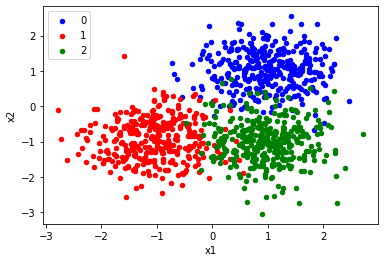

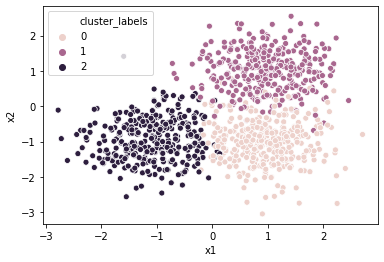

In [28]:
# first, create the data

from sklearn.datasets.samples_generator import make_blobs
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6, random_state = 24)
 
# Group the data by labels
mouse = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
groups = mouse.groupby('label')
 
# Plot the blobs
fig, ax = plt.subplots()
colors = ["blue", "red", "green"]
for idx, classification in groups:
    classification.plot(ax=ax, kind='scatter', x='x1', y='x2', label=idx, color=colors[idx])
plt.show()

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse,3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse,cluster_centers)

# Plot clusters
sns.scatterplot(x= 'x1', y='x2', 
                hue='cluster_labels', data = mouse)
plt.show()
